# Convolutional Neural Network
Here, we will use CNN to run image classification on pnemonia data.

## Import
---
Importing necessary packages and data

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers

import pickle

import os
import gc
from timeit import default_timer as timer

### Image Directories

In [2]:
train_dir = 'DATA/train'
test_dir = 'DATA/test'
val_dir = 'DATA/validation'

In [3]:
# remove unnecessary variables clogging memory
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

## Preprocess
---

In [70]:
train_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (150,150), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')
test_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(test_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')


Found 4043 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.
Found 586 images belonging to 2 classes.


## Baseline Model
---

In [6]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Evaluation Metrics
Since we don't want to miss any true pneumonia case, we will prioritize the recall score.

In [7]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [13]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=100, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
127/127 [==============================] - 71s 556ms/step - loss: 0.0846 - accuracy: 0.9676 - recall: 0.9780 - val_loss: 0.0669 - val_accuracy: 0.9772 - val_recall: 0.9973
Epoch 2/100
127/127 [==============================] - 74s 586ms/step - loss: 0.0740 - accuracy: 0.9711 - recall: 0.9777 - val_loss: 0.0557 - val_accuracy: 0.9812 - val_recall: 0.9907
Epoch 3/100
127/127 [==============================] - 73s 575ms/step - loss: 0.0672 - accuracy: 0.9745 - recall: 0.9813 - val_loss: 0.0477 - val_accuracy: 0.9842 - val_recall: 0.9947
Epoch 4/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0614 - accuracy: 0.9745 - recall: 0.9807 - val_loss: 0.0475 - val_accuracy: 0.9822 - val_recall: 0.9867
Epoch 5/100
127/127 [==============================] - 73s 572ms/step - loss: 0.0576 - accuracy: 0.9770 - recall: 0.9830 - val_loss: 0.0554 - val_accuracy: 0.9812 - val_recall: 0.9787
Epoch 6/100
127/127 [==============================] - 73s 576ms/step - loss: 0.

127/127 [==============================] - 72s 567ms/step - loss: 0.0023 - accuracy: 0.9990 - recall: 0.9993 - val_loss: 0.0698 - val_accuracy: 0.9881 - val_recall: 0.9947
Epoch 46/100
127/127 [==============================] - 72s 567ms/step - loss: 0.0013 - accuracy: 0.9993 - recall: 0.9997 - val_loss: 0.0629 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 47/100
127/127 [==============================] - 72s 566ms/step - loss: 0.0018 - accuracy: 0.9998 - recall: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 48/100
127/127 [==============================] - 72s 567ms/step - loss: 0.0020 - accuracy: 0.9995 - recall: 0.9993 - val_loss: 0.0868 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 49/100
127/127 [==============================] - 72s 566ms/step - loss: 6.6319e-04 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 50/100
127/127 [==============================] - 72s 569ms/step - loss: 2.519

Epoch 89/100
127/127 [==============================] - 72s 569ms/step - loss: 0.0016 - accuracy: 0.9998 - recall: 1.0000 - val_loss: 0.1436 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 90/100
127/127 [==============================] - 72s 568ms/step - loss: 4.2941e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 91/100
127/127 [==============================] - 72s 567ms/step - loss: 3.0501e-06 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.3077 - val_accuracy: 0.9743 - val_recall: 1.0000
Epoch 92/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0015 - accuracy: 0.9998 - recall: 0.9997 - val_loss: 0.1359 - val_accuracy: 0.9861 - val_recall: 0.9933
Epoch 93/100
127/127 [==============================] - 73s 573ms/step - loss: 6.9887e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 94/100
127/127 [==============================] - 73s 578

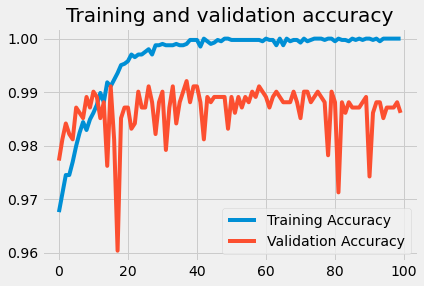

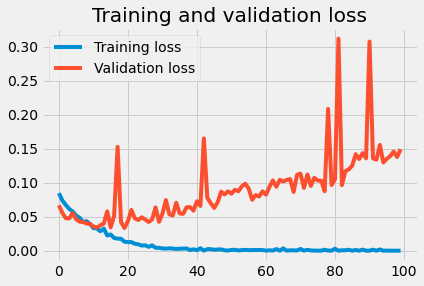

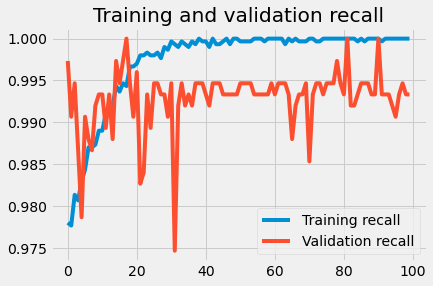

In [14]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, hist_['recall'], label='Training recall')
    plt.plot(epochs, hist_['val_recall'], label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()
    
    plt.show()
    
plot_performance(history)

In [15]:
# saving model
#os.mkdir('MODEL')
model.save('MODEL/baseline_model.h5')

It seems like around 16-18 is ideal number of epoch.

It seems like the testing loss is much higher compared to the training loss. This will benefit from having more data. So we will implement data augmentation. But before that, I want to address 2 foundational issues first.  
1. Test different optimizer  
2. Test balancing the class weight as our data is slightly imbalance.  

## Optimizer
Testing Adam optimizer

In [72]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 77s 602ms/step - loss: 0.2862 - accuracy: 0.8795 - recall: 0.9587 - val_loss: 0.1085 - val_accuracy: 0.9574 - val_recall: 0.9813
Epoch 2/20
127/127 [==============================] - 77s 609ms/step - loss: 0.1113 - accuracy: 0.9584 - recall: 0.9703 - val_loss: 0.1562 - val_accuracy: 0.9386 - val_recall: 0.9933
Epoch 3/20
127/127 [==============================] - 77s 607ms/step - loss: 0.1008 - accuracy: 0.9577 - recall: 0.9680 - val_loss: 0.0664 - val_accuracy: 0.9743 - val_recall: 0.9787
Epoch 4/20
127/127 [==============================] - 77s 606ms/step - loss: 0.0780 - accuracy: 0.9718 - recall: 0.9777 - val_loss: 0.0628 - val_accuracy: 0.9762 - val_recall: 0.9813
Epoch 5/20
127/127 [==============================] - 77s 604ms/step - loss: 0.0571 - accuracy: 0.9790 - recall: 0.9823 - val_loss: 0.0686 - val_accuracy: 0.9762 - val_recall: 0.9773
Epoch 6/20
127/127 [==============================] - 76s 599ms/step - loss: 0.0574 -

KeyboardInterrupt: 

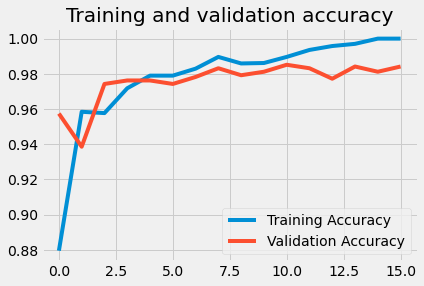

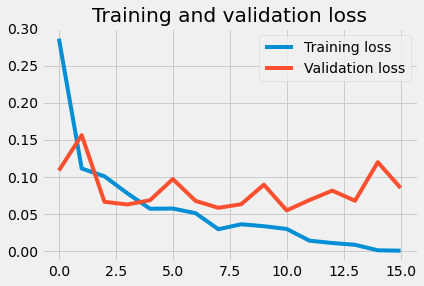

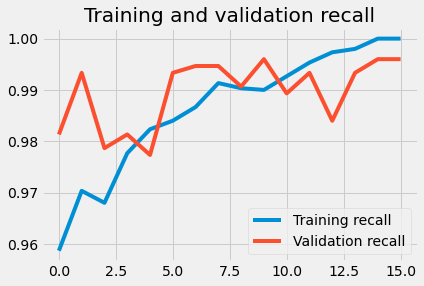

In [77]:
plot_performance(model.history)

It seems like Adams optimizer indeed converged much sooner than RMSprop. We will use Adams going forward.

## Balanced Class Weight
Balancing class weight to see if it helps.

In [88]:
# find the weight
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', [0, 1], train_g.classes)
weights = dict(zip([0, 1], weights))

Epoch 1/15
127/127 [==============================] - 107s 844ms/step - loss: 0.3484 - accuracy: 0.8353 - recall: 0.8234 - val_loss: 0.1658 - val_accuracy: 0.9366 - val_recall: 0.9840
Epoch 2/15
127/127 [==============================] - 107s 842ms/step - loss: 0.1486 - accuracy: 0.9446 - recall: 0.9414 - val_loss: 0.1566 - val_accuracy: 0.9376 - val_recall: 0.9173
Epoch 3/15
127/127 [==============================] - 106s 835ms/step - loss: 0.0979 - accuracy: 0.9634 - recall: 0.9617 - val_loss: 0.0752 - val_accuracy: 0.9644 - val_recall: 0.9560
Epoch 4/15
127/127 [==============================] - 106s 837ms/step - loss: 0.0739 - accuracy: 0.9738 - recall: 0.9710 - val_loss: 0.0758 - val_accuracy: 0.9743 - val_recall: 0.9973
Epoch 5/15
127/127 [==============================] - 106s 836ms/step - loss: 0.0683 - accuracy: 0.9740 - recall: 0.9710 - val_loss: 0.0674 - val_accuracy: 0.9733 - val_recall: 0.9693
Epoch 6/15
127/127 [==============================] - 106s 834ms/step - loss: 0.

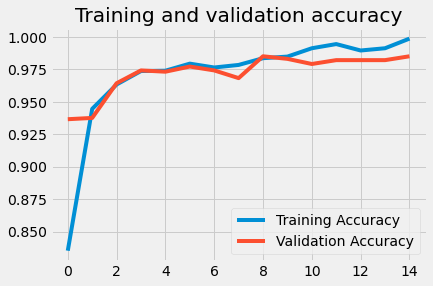

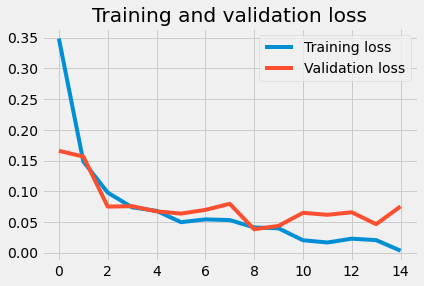

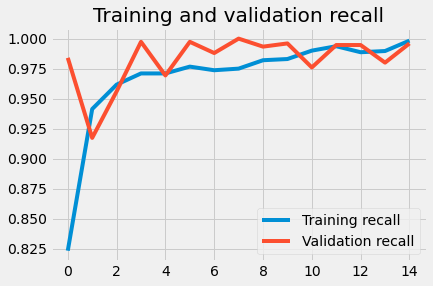

In [90]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g, 
                    epochs=15, 
                    class_weight=weights,
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

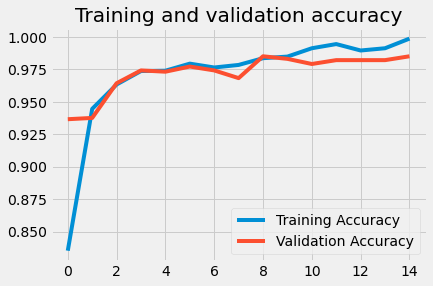

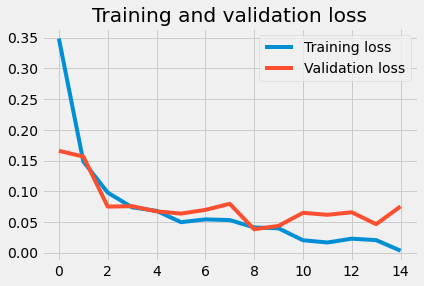

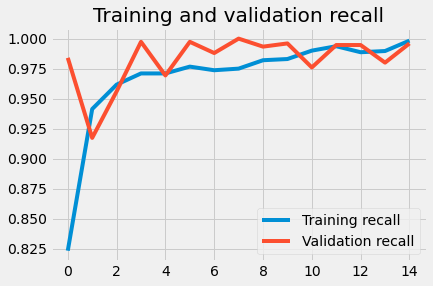

In [93]:
plot_performance(history)

It seems like balanced class weight is very slightly lowering validation loss.

## Data Augmentation
---
Now we will try adding more data. From the baseline models, we saw that training do converge to 100% accuracy, even though the validation tends to plateau much sooner. 

### Model 1 
Baseline model with more data (augmented) + epochs

In [96]:
data_aug_train = image.ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.1, 
                                   height_shift_range = 0.1,
                                   brightness_range = [0.7, 1.0],
                                   zoom_range = 0.1)

train_g2 = data_aug_train.flow_from_directory(train_dir,
                                              target_size = (150,150), 
                                              color_mode='grayscale',
                                              class_mode='binary')

Found 4043 images belonging to 2 classes.


In [97]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

Epoch 1/40
127/127 [==============================] - 115s 902ms/step - loss: 0.5015 - accuracy: 0.7727 - recall: 0.9607 - val_loss: 0.2543 - val_accuracy: 0.8921 - val_recall: 0.8960
Epoch 2/40
127/127 [==============================] - 113s 891ms/step - loss: 0.2671 - accuracy: 0.8847 - recall: 0.9274 - val_loss: 0.1235 - val_accuracy: 0.9505 - val_recall: 0.9640
Epoch 3/40
127/127 [==============================] - 114s 896ms/step - loss: 0.2226 - accuracy: 0.9072 - recall: 0.9424 - val_loss: 0.1097 - val_accuracy: 0.9535 - val_recall: 0.9627
Epoch 4/40
127/127 [==============================] - 113s 890ms/step - loss: 0.1885 - accuracy: 0.9211 - recall: 0.9454 - val_loss: 0.1314 - val_accuracy: 0.9584 - val_recall: 0.9907
Epoch 5/40
127/127 [==============================] - 112s 885ms/step - loss: 0.1761 - accuracy: 0.9300 - recall: 0.9540 - val_loss: 0.0801 - val_accuracy: 0.9782 - val_recall: 0.9907
Epoch 6/40
127/127 [==============================] - 113s 887ms/step - loss: 0.

KeyboardInterrupt: 

In [111]:
# training
start = timer()

history = model.fit(train_g2, 
                    epochs=120, 
                    initial_epoch=90,
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 91/120
127/127 [==============================] - 114s 898ms/step - loss: 0.0421 - accuracy: 0.9834 - recall: 0.9867 - val_loss: 0.0581 - val_accuracy: 0.9901 - val_recall: 0.9933
Epoch 92/120
127/127 [==============================] - 114s 895ms/step - loss: 0.0434 - accuracy: 0.9844 - recall: 0.9887 - val_loss: 0.0593 - val_accuracy: 0.9842 - val_recall: 0.9973
Epoch 93/120
127/127 [==============================] - 113s 892ms/step - loss: 0.0408 - accuracy: 0.9837 - recall: 0.9877 - val_loss: 0.0629 - val_accuracy: 0.9851 - val_recall: 0.9907
Epoch 94/120
127/127 [==============================] - 114s 895ms/step - loss: 0.0375 - accuracy: 0.9861 - recall: 0.9890 - val_loss: 0.0508 - val_accuracy: 0.9901 - val_recall: 0.9933
Epoch 95/120
127/127 [==============================] - 114s 895ms/step - loss: 0.0417 - accuracy: 0.9827 - recall: 0.9873 - val_loss: 0.0556 - val_accuracy: 0.9842 - val_recall: 0.9880
Epoch 96/120
127/127 [==============================] - 113s 891ms/ste

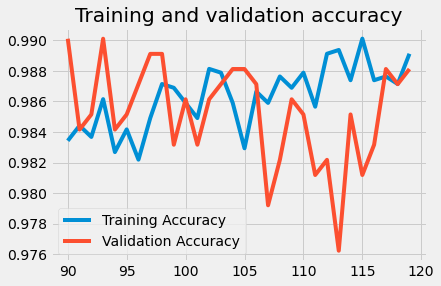

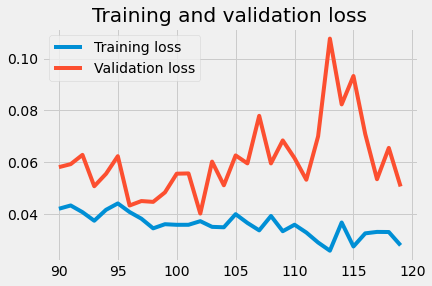

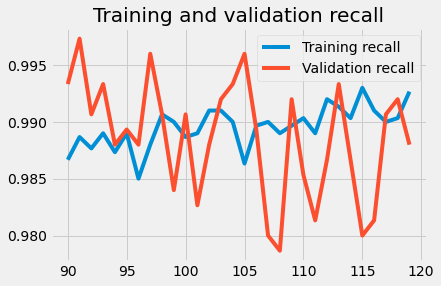

In [112]:
plot_performance(model.history)

In [113]:
# saving model
model.save('MODEL/model1.h5')

Validation loss is consistently less than training loss. This is probably because the data augmentation is resulting in data that is more difficult to figure out. Additionally training loss seems to converge very slowly, I'll try to decrease the complexity.

### Model 2 
This time we will increase the complexity of the network and reduce the data augmentation criteria to make sure that the training problem is not unreasonably difficult.

In [ ]:
data_aug_train2 = image.ImageDataGenerator(rescale = 1/255,
                                   brightness_range = [0.7, 1.0],
                                   zoom_range = 0.1)

train_g3 = data_aug_train2.flow_from_directory(train_dir,
                                              target_size = (150,150), 
                                              color_mode='grayscale',
                                              class_mode='binary')

# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(amsgrad = True),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g3, 
                    epochs=50, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

# saving model
model.save('MODEL/model2.h5')

Found 4043 images belonging to 2 classes.
Epoch 1/50
127/127 [==============================] - 80s 632ms/step - loss: 0.3173 - accuracy: 0.8603 - recall: 0.9454 - val_loss: 0.1906 - val_accuracy: 0.9168 - val_recall: 0.8960
Epoch 2/50
127/127 [==============================] - 81s 634ms/step - loss: 0.1535 - accuracy: 0.9392 - recall: 0.9583 - val_loss: 0.0944 - val_accuracy: 0.9614 - val_recall: 0.9853
Epoch 3/50
127/127 [==============================] - 80s 627ms/step - loss: 0.1299 - accuracy: 0.9498 - recall: 0.9667 - val_loss: 0.0923 - val_accuracy: 0.9663 - val_recall: 0.9853
Epoch 4/50
127/127 [==============================] - 81s 637ms/step - loss: 0.1261 - accuracy: 0.9515 - recall: 0.9657 - val_loss: 0.0782 - val_accuracy: 0.9782 - val_recall: 0.9907
Epoch 5/50
127/127 [==============================] - 80s 632ms/step - loss: 0.1120 - accuracy: 0.9570 - recall: 0.9663 - val_loss: 0.0739 - val_accuracy: 0.9812 - val_recall: 0.9907
Epoch 6/50
127/127 [=======================

In [ ]:
plot_performance(model.history)

# Final Model Performance
---
Testing the final models on the testset

In [ ]:
#testing
hist_test = model.evaluate(test_g, workers = 8)

In [ ]:
print('test_loss:', hist_test[0], 'test_accuracy:', hist_test[1], 'test_recall:', hist_test[2])